## Video 6.1

In [1]:
import gensim
import nltk
import numpy as np
from sklearn.decomposition import PCA
from nltk.corpus import  brown,gutenberg
import nltk.corpus
import matplotlib.pyplot as plt

%matplotlib inline

## Start with Brown corpus from NLTK

In [ ]:
#!conda install -c anaconda gensim -y

In [ ]:
#nltk.download('brown')
# Grab Brown corpus from NLTK if not already downloaded

In [2]:
len(nltk.corpus.brown.sents())

57340

In [3]:
sentences = brown.sents()

In [4]:
sentences[0]

['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of',
 "Atlanta's",
 'recent',
 'primary',
 'election',
 'produced',
 '``',
 'no',
 'evidence',
 "''",
 'that',
 'any',
 'irregularities',
 'took',
 'place',
 '.']

## Create a word2vec vector space model

In [5]:
%%time
model = gensim.models.word2vec.Word2Vec(sentences, \
    size=100, window=5, min_count=5, workers=4, hs=1,negative=0)

CPU times: user 38 s, sys: 4.66 s, total: 42.7 s
Wall time: 32.2 s


In [6]:
model.most_similar('mother')

/home/salas/miniconda3/envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('father', 0.8804240226745605),
 ('husband', 0.8453187942504883),
 ('brother', 0.8070403337478638),
 ('son', 0.7753714919090271),
 ('wife', 0.7521494626998901),
 ('voice', 0.7203897833824158),
 ('uncle', 0.7098096609115601),
 ('daughter', 0.7056980133056641),
 ('sister', 0.6934696435928345),
 ('youngster', 0.680888831615448)]

In [7]:
model.doesnt_match(['king','queen','prince','Edward'])

/home/salas/miniconda3/envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.


'Edward'

## Use Pretrained Google News Vectors

### Grab from [here](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing)

In [8]:
%time model = gensim.models.KeyedVectors.load_word2vec_format(\
                        'data/GoogleNews-vectors-negative300.bin', binary=True)  

CPU times: user 1min 45s, sys: 1min 21s, total: 3min 7s
Wall time: 3min 7s


## Visualise

In [9]:
%%time
X = model[model.wv.vocab]

/home/salas/miniconda3/envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


CPU times: user 15.6 s, sys: 8.61 s, total: 24.2 s
Wall time: 24.2 s


In [10]:
%%time
pca = PCA(n_components=2)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 31.9 µs


In [11]:
%%time
result = pca.fit_transform(X)

CPU times: user 1min 47s, sys: 59.7 s, total: 2min 47s
Wall time: 53.5 s


/home/salas/miniconda3/envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


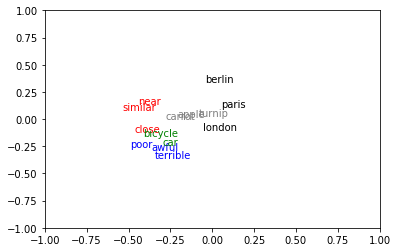

In [12]:
words = list(model.wv.vocab)

colours=['black','red','blue','grey','green']

for n,wordList in enumerate([['paris','london','berlin'],['near','close','similar'],\
        ['terrible','awful','poor'],['carrot','apple','turnip'],['car','bicycle']]):
    for nn,word in enumerate(wordList):
        i=words.index(word)
        plt.annotate(word, xy=(result[i, 0], result[i, 1]),color=colours[n])
    
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()